In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage
%matplotlib inline

In [2]:
from skimage.measure import ransac
np.random.seed(seed = 1)

In [3]:
#generating data

In [4]:
x = np.arange(-300 , 300)
y = 0.5*x + 50
data = np.column_stack([x,y])

In [5]:
data_noise = np.random.normal(size = data.shape)

data += 2*data_noise
data[::2] += 3*data_noise[::2]
data[::5] += 150*data_noise[::5]

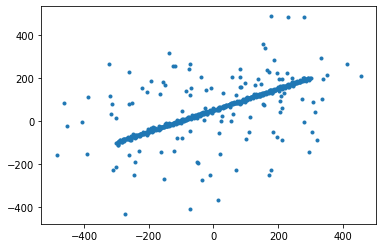

In [6]:
plt.plot(data[:,0], data[:,1], '.')

In [7]:
#fitting a line

In [8]:
from skimage.measure import ransac, LineModelND

In [9]:
nd_model = LineModelND()
nd_model.estimate(data)
nd_model.params
#first one is origin next is direction

(array([-0.72164239, 50.07774729]), array([0.88891616, 0.45806994]))

In [10]:
x1 = np.arange(-500, 500)

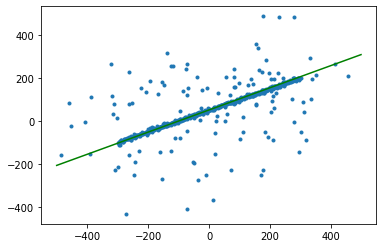

In [11]:
origin, direction = nd_model.params
plt.plot(data[:,0], data[:,1], '.')
plt.plot(x1, nd_model.predict_y(x1), 'g-')

In [12]:
#finding the outliers

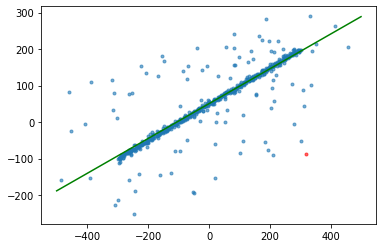

In [18]:
model_robust, inliers = ransac(data, LineModelND, min_samples=2, residual_threshold=200, max_trials=1500)

outliers = (inliers == False)

yy = model_robust.predict_y(x1)

fig, ax = plt.subplots()

ax.plot(data[inliers, 0], data[inliers, 1], '.', alpha=0.6)
ax.plot(data[outliers, 0], data[outliers, 1],'.', color = 'r', alpha=0.6)
ax.plot(x1, yy, '-g')

plt.show()

In [21]:
type(inliers)

numpy.ndarray

In [22]:
print(inliers)

[False  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  True False  True  True  True
  True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True  True False  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True False  True  True  True  True False  True  True  True  True False
  True  True  True  True False  True  True  True  True False  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True False
  True  True  True  True False  True  True  True  T

In [16]:
len(inliers)

600

In [17]:
print(data)

[[ -48.22646863 -194.82224412]
 [-300.0563435  -101.64593724]
 [-293.67296185 -110.50769348]
 ...
 [ 299.7597598   198.18631478]
 [ 294.76754487  191.75504226]
 [ 300.55898373  197.32739819]]


In [18]:
print(outliers)

[False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False Fa

In [19]:
print(len(data))

600


In [20]:
print(len(outliers))

600


In [21]:
from array import array

In [ ]:
x = np.array([[1,2,3],
        [4,5,6],
        [7,8,9]])

In [ ]:
np.delete(x, (1), axis=0)

In [ ]:
print(x)

In [15]:
idx = 0
sasa = []
for j in outliers:
    if(j == True):
        sasa.append(idx)
        #print(idx)
        #data[idx][0] = -1
        #data[idx][1] = -1
        #data = np.delete(data, (idx), axis=0)
    idx = idx+1
data = np.delete(data, sasa, axis = 0) 

In [16]:
len(data)

577

In [17]:
idx = 0
sasa = []
for x in data:
    #print(x[0])
    if(x[0] == -1 and x[1] == -1):
        sasa.append(idx)
        #sasa = np.delete(sasa, (idx), axis=0)
    idx = idx+1
data = np.delete(data, sasa, axis = 0)

In [ ]:
len(data)

In [ ]:
for x in sasa:
    print(x)

In [ ]:
for x in data:
    print(x)

In [ ]:
data[5][0]

In [ ]:
np.delete(data, (1), axis=0)

In [ ]:
data

In [ ]:
data[0][0]

In [ ]:
data[0][1]

In [ ]:
sasa

In [ ]:
sasa[0][0]

In [ ]:
sasa[0]